In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
import xrd
from importlib import reload
reload(xrd)

<module 'xrd' from '/Users/vekeryk/Projects/master-project/workspace/modules/xrd.py'>

In [2]:
def load_dataset(filename="10_000.pkl"):
    """Load saved dataset"""
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data['X'], data['Y']

In [3]:
def save_dataset(X_train, Y_train, file_path):
    """Save the training dataset to a file."""
    with open(file_path, 'wb') as f:
        pickle.dump({'X': X_train, 'Y': Y_train}, f)
    print(f"Saved samples to {file_path}")

In [4]:
X_train, Y_train = load_dataset("datasets/long_run.pkl")
print(X_train.shape)  # -> torch.Size([10000, 3])
print(Y_train.shape)  # -> torch.Size([10000, 100])

torch.Size([100000, 7])
torch.Size([100000, 650])


In [5]:
# 170 точок. Функція у PyTorch створює тензор із рівновіддалених чисел між start і end.
x = torch.linspace(0, 170 - 1, 170)
rng = np.random.default_rng()

ValueError: x and y must have same first dimension, but have shapes (170,) and (650,)

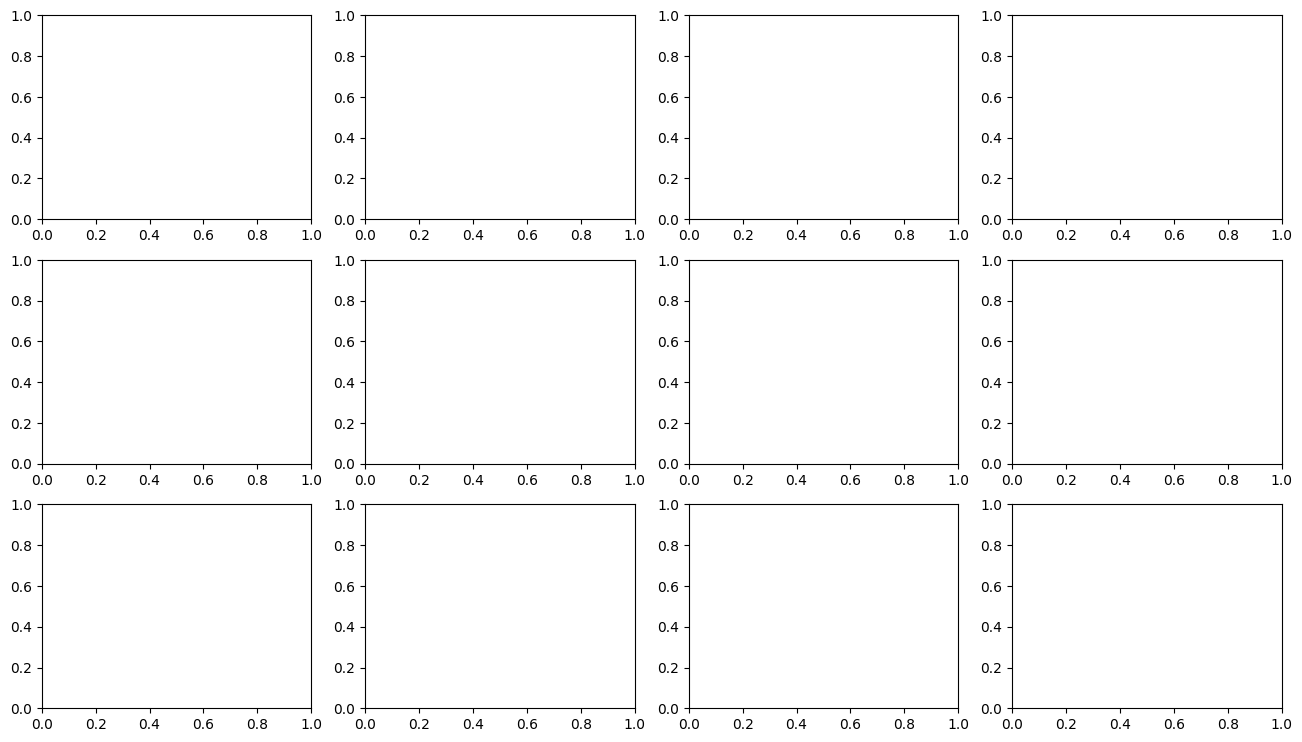

In [6]:
fig, axes = plt.subplots(3, 4, figsize=(16, 9))  # 3 rows, 4 columns

for i, ax in enumerate(axes.flat):
    rand_idx = np.random.randint(0, X_train.shape[0])
    ax.plot(x, Y_train[rand_idx].cpu().numpy(), label=f"Curve {rand_idx}")
    x_vals = X_train[rand_idx].cpu().numpy()
    ax.set_title(f"Sample {rand_idx}\nX_train: [{x_vals[0]:.4f}, {x_vals[1]:.4f}, {x_vals[4]:.4f}]")
    ax.grid(True)
    ax.set_ylim(0, 0.01)

plt.tight_layout()
plt.show()


In [ ]:
import xrd
from importlib import reload
reload(xrd)

X_train, Y_train = xrd.generate_train_dataset(10000)

Invalid D01 value: 0.002 0.0014194093260580225
Invalid D01 value: 0.004402709374180929 0.0
Invalid D01 value: 0.007030771194787184 0.0011525013261528038
Invalid D01 value: 0.004456693123339057 0.0
Invalid D01 value: 0.006740434984716794 0.0
Invalid D01 value: 0.0062036140227252545 0.001960381216169228
Invalid D01 value: 0.011122737720083601 0.0005688503475493947
Invalid D01 value: 0.006252928290742735 0.0013147470955362905
Invalid D01 value: 0.002 0.0007199931384178175
Invalid D01 value: 0.0023127816998964705 0.0
Invalid D01 value: 0.005448953848571742 0.001567157067816299
Invalid D01 value: 0.002017079813831211 0.0014256133608069282
Invalid D01 value: 0.003621739490572203 0.0
Invalid D01 value: 0.004542947293920407 0.0
Invalid D01 value: 0.004124502557072878 0.0015339237516342006
Invalid D01 value: 0.0030079211600082378 0.000165749523323825
Invalid D01 value: 0.004245499084312849 0.0010895497816796563
Invalid D01 value: 0.003059982871583897 0.0019996668612241686
Invalid D01 value: 0.0

<Figure size 1200x600 with 0 Axes>

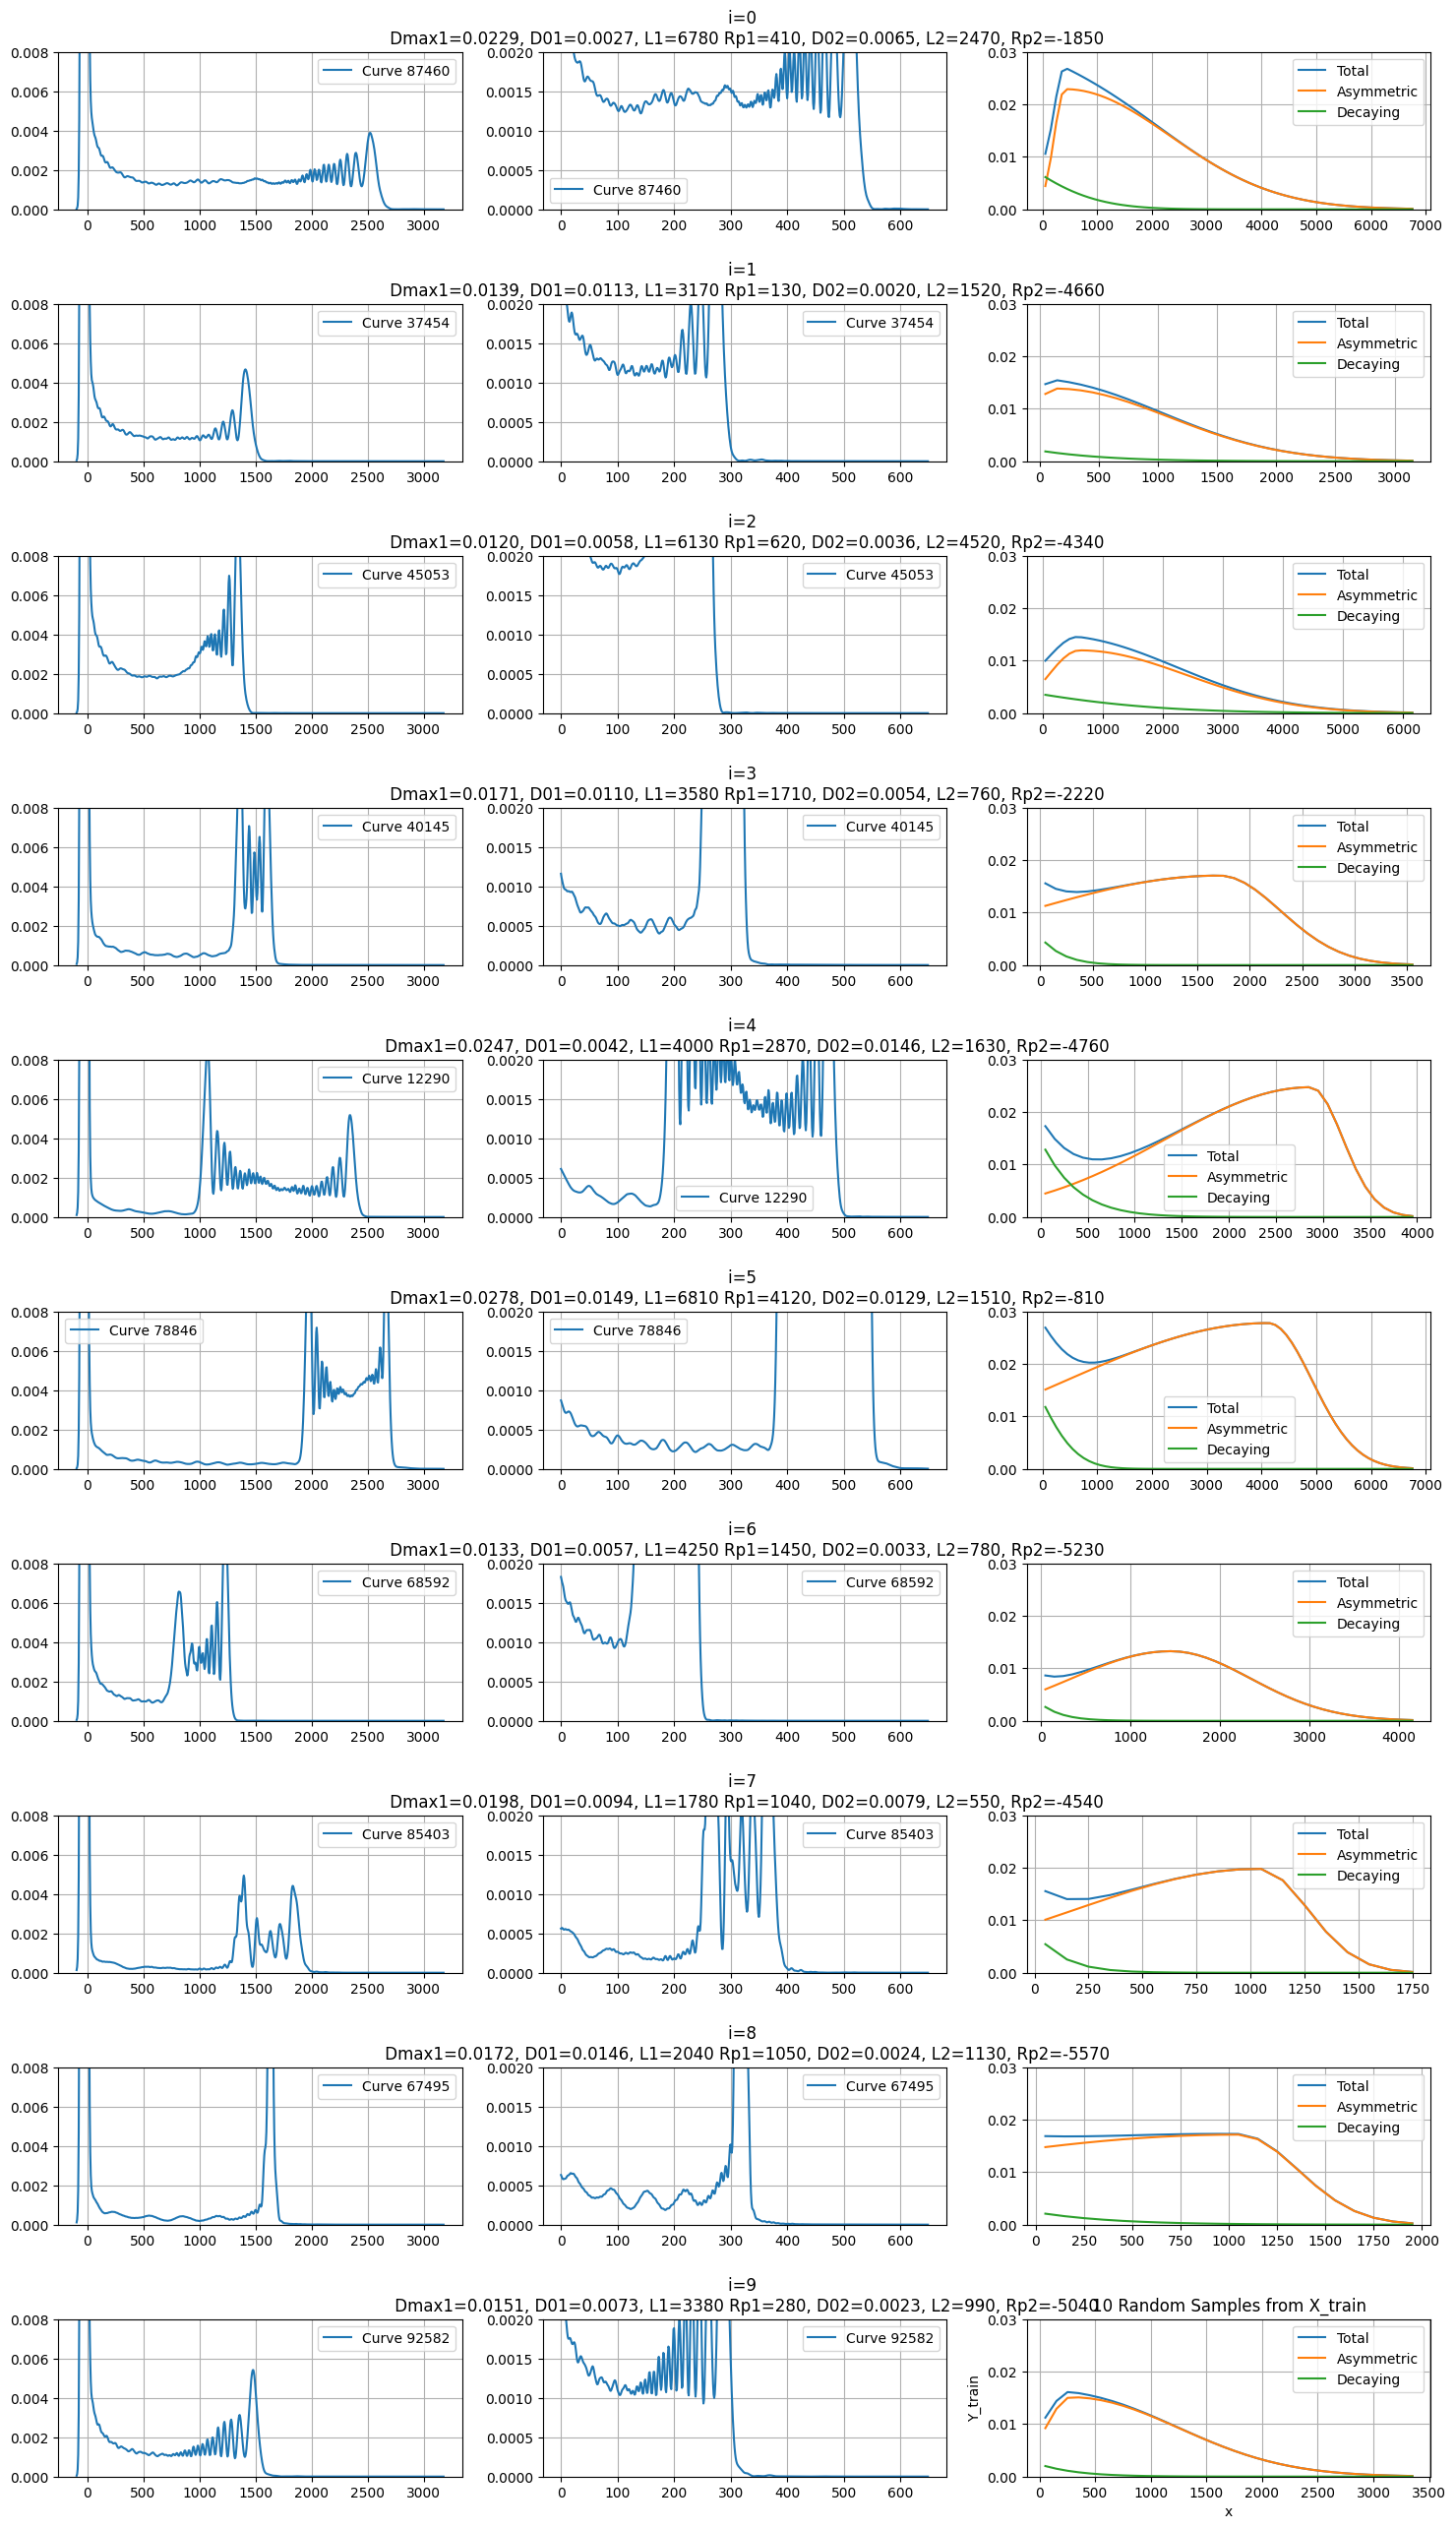

In [ ]:
# random examples from X_train, Y_train

import helpers as h
import xrd
from importlib import reload
reload(xrd)
reload(h)

rng = np.random.default_rng()
indices = rng.choice(X_train.shape[0], size=10, replace=False)
plt.figure(figsize=(12, 6))

fig, axes = plt.subplots(len(indices), 3, figsize=(18, 32))
plt.subplots_adjust(hspace=0.6)  # add vertical space between rows

# for idx in indices:
#     # plt.plot(x.cpu().numpy(), Y_train[idx].cpu().numpy(), label=f"Sample {idx}")
#     curve, profile = xrd.compute_curve_and_profile(X_train[idx])

for i, idx in enumerate(indices):
    # print(X_train[idx])
    curve, profile = xrd.compute_curve_and_profile(tensor=X_train[idx])
    axes[i, 0].plot(curve.X_DeltaTeta, curve.Y_R_vseZ, label=f"Curve {idx}")
    # axes[i, 0].set_title(f"Sample {idx}\nX_train: [{X_train[idx][0]:.4f}, {X_train[idx][1]:.4f}, {X_train[idx][2]:.4f}]")
    axes[i, 0].grid(True)
    axes[i, 0].set_ylim(0, 0.008)
    axes[i, 0].legend()

    axes[i, 1].plot(curve.X, curve.Y, label=f"Curve {idx}")
    axes[i, 1].set_title(
        f"i={i} \n {h.fparam(arr=X_train[idx])}"
    )
    axes[i, 1].grid(True)
    axes[i, 1].set_ylim(0, 0.002)
    axes[i, 1].legend()

    axes[i, 2].plot(profile.X, profile.total_Y, label="Total")
    axes[i, 2].plot(profile.X, profile.asymmetric_Y, label="Asymmetric")
    axes[i, 2].plot(profile.X, profile.decaying_Y, label="Decaying")
    # axes[i, 2].set_title(f"Profile {idx}")
    axes[i, 2].set_ylim(0, 0.03)
    axes[i, 2].grid(True)
    axes[i, 2].legend()

plt.title("10 Random Samples from X_train")
plt.xlabel("x")
plt.ylabel("Y_train")
plt.grid(True)
plt.legend()
plt.show()

***if (ML is True):**** 0.013050 0.001700 5.80e-05 3.50e-05 0.004845 4.00e-05 -5.00e-06


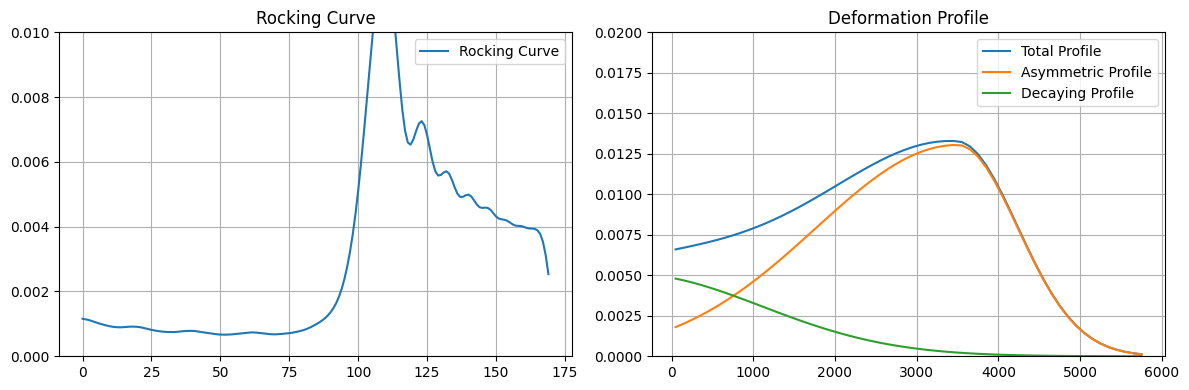

In [ ]:
import xrd
from importlib import reload
reload(xrd)

curve, profile = xrd.compute_curve_and_profile()

fig, axes = plt.subplots(1, 2, figsize=(12, 4)) # 12 width, 4 height

axes[0].set_title("Rocking Curve")
axes[0].plot(curve.X, curve.Y, label="Rocking Curve")
axes[0].set_ylim(0, 0.01)
axes[0].grid(True)
axes[0].legend()

axes[1].set_title("Deformation Profile")
axes[1].plot(profile.X, profile.total_Y, label="Total Profile")
axes[1].plot(profile.X, profile.asymmetric_Y, label="Asymmetric Profile")
axes[1].plot(profile.X, profile.decaying_Y, label="Decaying Profile")
axes[1].set_ylim(0, 0.02)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# compare original params/normalized/denormalized
from train_from_file import PickleXRDDataset, denorm_params

ds_tr = PickleXRDDataset(X_train[[0, 0]], Y_train[[0, 0]], train=True)
print(ds_tr)
dl_tr = torch.utils.data.DataLoader(ds_tr, shuffle=True)
print(ds_tr)

for x, y in dl_tr:
    x, y = x.to('cpu'), y.to('cpu')
    print(x.shape, y.shape)

print(X_train[[0, 0]])
print(y)
denorm_params(y)

torch.Size([1, 1, 650]) torch.Size([1, 7])
torch.Size([1, 1, 650]) torch.Size([1, 7])
tensor([[ 2.8431e-02,  2.1039e-02,  6.2100e-05,  1.0400e-05,  2.9092e-03,
          1.6600e-05, -3.3800e-05],
        [ 2.8431e-02,  2.1039e-02,  6.2100e-05,  1.0400e-05,  2.9092e-03,
          1.6600e-05, -3.3800e-05]], device='mps:0')
tensor([[0.9440, 0.6910, 0.8683, 0.1486, 0.0325, 0.1100, 0.4367]])


tensor([[ 2.8431e-02,  2.1039e-02,  6.2100e-05,  1.0400e-05,  2.9092e-03,
          1.6600e-05, -3.3800e-05]])

True params: [0.009646, 0.002514, 4.63e-05, 1.27e-05, 0.003506, 2.2e-05, -3.95e-05], Pred params: [0.009411, 0.00238, 4.775e-05, 1.264e-05, 0.003635, 2.8e-05, -3.677e-05]
True params: [0.008145, 0.002767, 2.16e-05, 1.39e-05, 0.003012, 7e-06, -9.7e-06], Pred params: [0.008284, 0.002457, 2.067e-05, 1.436e-05, 0.003367, 1.1e-05, -3.631e-05]
True params: [0.019412, 0.00392, 4.35e-05, 2.54e-05, 0.01287, 1.7e-05, -1.68e-05], Pred params: [0.019142, 0.003949, 4.216e-05, 2.426e-05, 0.01272, 1.5e-05, -1.962e-05]
True params: [0.026213, 0.02068, 4.39e-05, 2.16e-05, 0.005454, 1.4e-05, -2.23e-05], Pred params: [0.026694, 0.020879, 4.209e-05, 2.2e-05, 0.004641, 1.5e-05, -3.174e-05]
True params: [0.027976, 0.01974, 2.76e-05, 1.08e-05, 0.008224, 9e-06, -2.59e-05], Pred params: [0.028246, 0.019012, 2.987e-05, 1.351e-05, 0.009299, 1.2e-05, -3.609e-05]
True params: [0.010601, 0.002099, 5.07e-05, 3.18e-05, 0.004053, 2.3e-05, -2.74e-05], Pred params: [0.010101, 0.002393, 4.895e-05, 3.187e-05, 0.003542, 2.

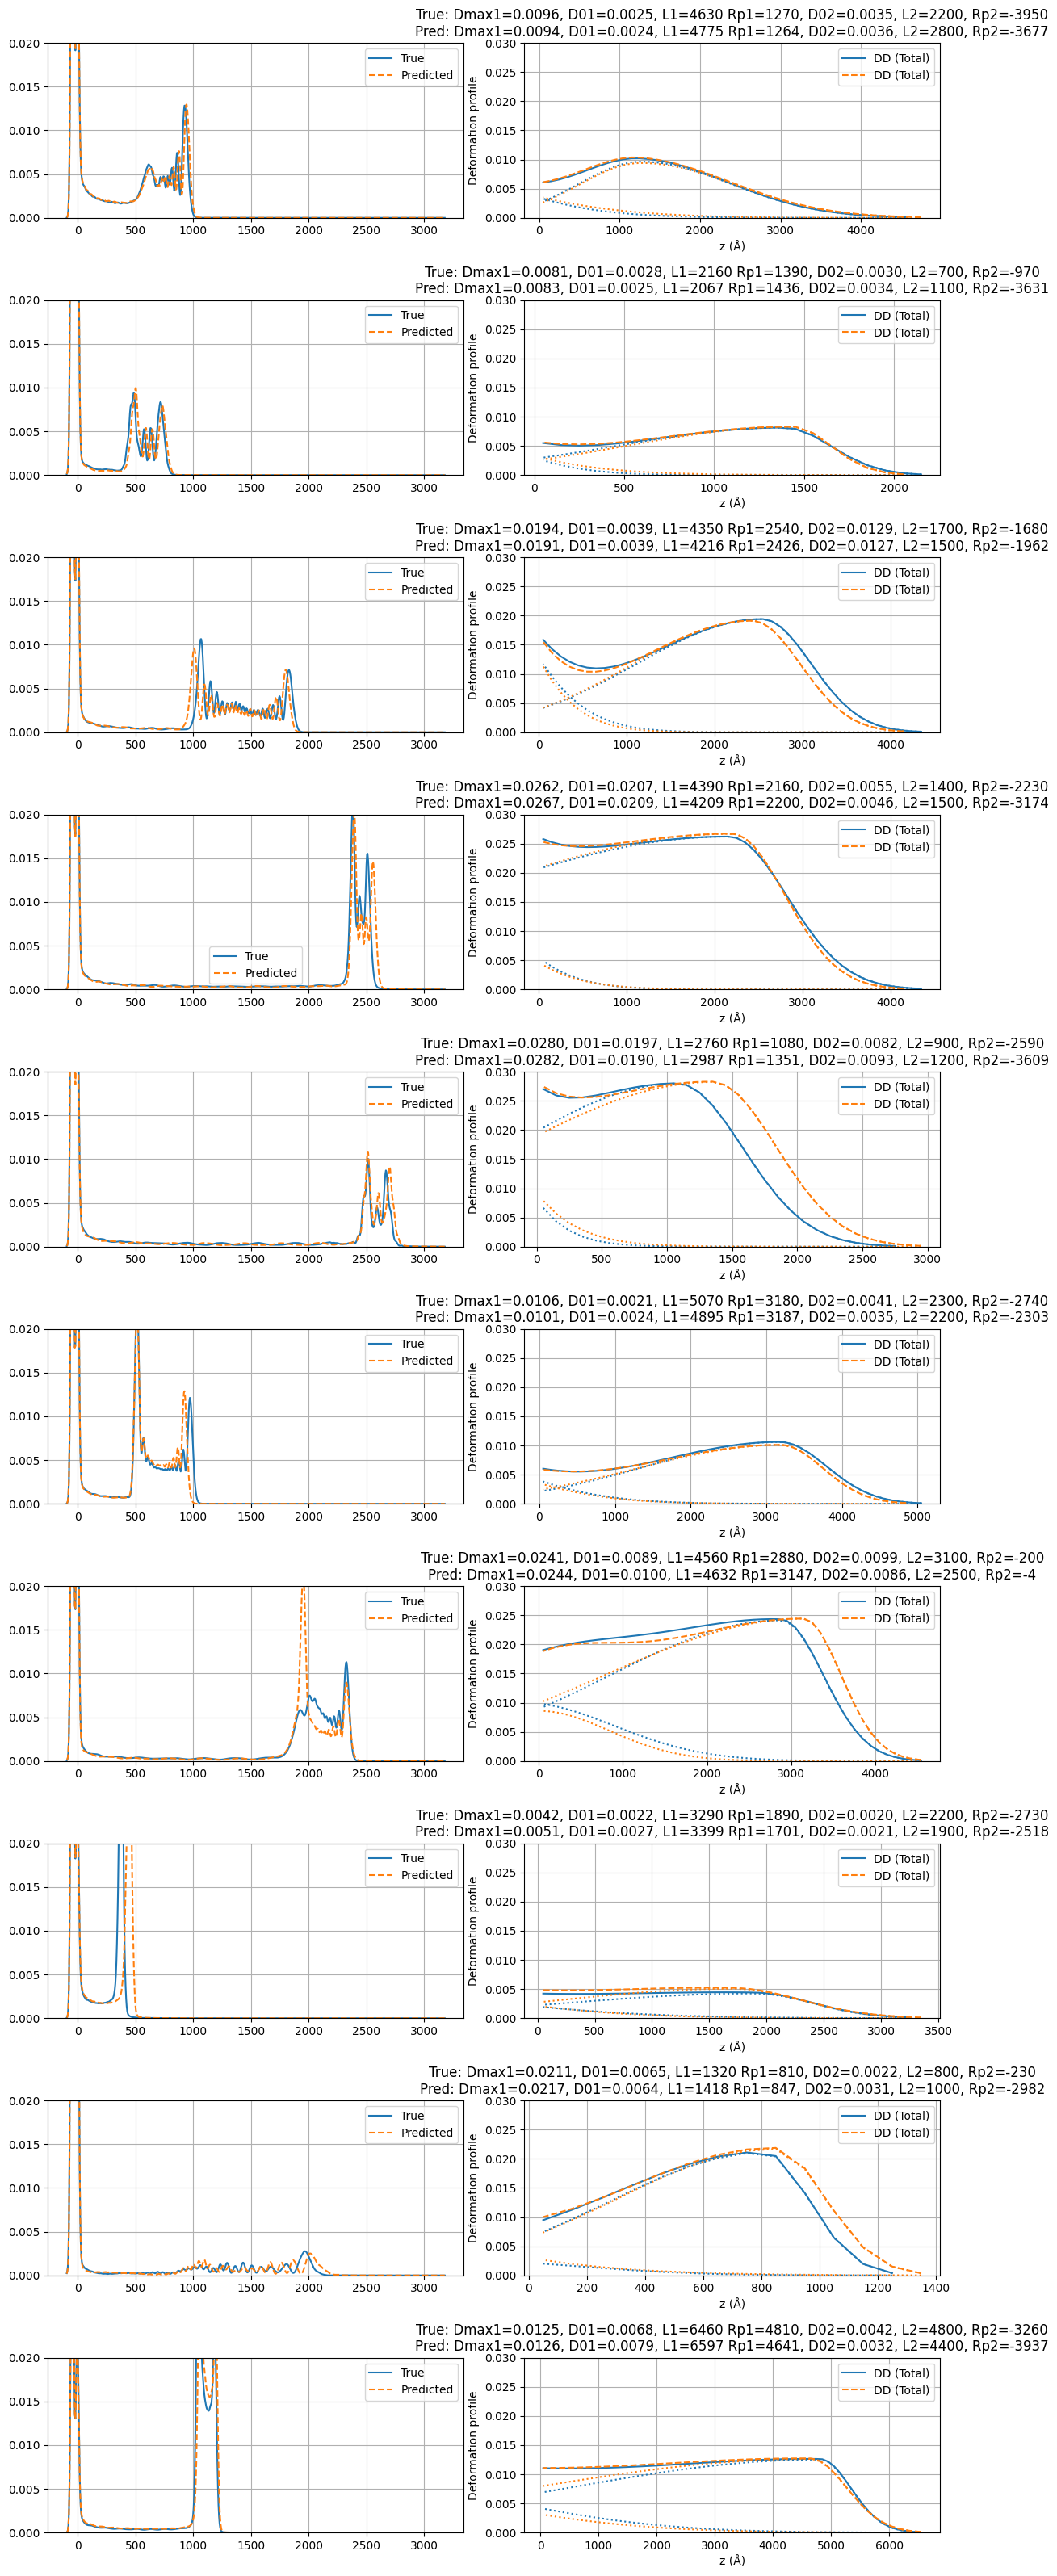

In [7]:
import xrd
import helpers as h
from importlib import reload
reload(xrd)

# Examples after training (true vs predicted):
true_pred_pairs = [
  ([0.009646,0.002514,4.630e-05,1.270e-05,3.506e-03,0.000022,-3.950e-05], [0.009411,0.002380,4.775e-05,1.264e-05,3.635e-03,0.000028,-3.677e-05]),
  ([0.008145,0.002767,2.160e-05,1.390e-05,3.012e-03,0.000007,-9.700e-06], [0.008284,0.002457,2.067e-05,1.436e-05,3.367e-03,0.000011,-3.631e-05]),
  ([0.019412,0.003920,4.350e-05,2.540e-05,1.287e-02,0.000017,-1.680e-05], [0.019142,0.003949,4.216e-05,2.426e-05,1.272e-02,0.000015,-1.962e-05]),
  ([0.026213,0.020680,4.390e-05,2.160e-05,5.454e-03,0.000014,-2.230e-05], [0.026694,0.020879,4.209e-05,2.200e-05,4.641e-03,0.000015,-3.174e-05]),
  ([0.027976,0.019740,2.760e-05,1.080e-05,8.224e-03,0.000009,-2.590e-05], [0.028246,0.019012,2.987e-05,1.351e-05,9.299e-03,0.000012,-3.609e-05]),
  ([0.010601,0.002099,5.070e-05,3.180e-05,4.053e-03,0.000023,-2.740e-05], [0.010101,0.002393,4.895e-05,3.187e-05,3.542e-03,0.000022,-2.303e-05]),
  ([0.024135,0.008939,4.560e-05,2.880e-05,9.869e-03,0.000031,-2.000e-06], [0.024418,0.009971,4.632e-05,3.147e-05,8.614e-03,0.000025,-3.986e-08]),
  ([0.004245,0.002222,3.290e-05,1.890e-05,2.020e-03,0.000022,-2.730e-05], [0.005068,0.002714,3.399e-05,1.701e-05,2.130e-03,0.000019,-2.518e-05]),
  ([0.021082,0.006483,1.320e-05,8.100e-06,2.168e-03,0.000008,-2.300e-06], [0.021695,0.006400,1.418e-05,8.474e-06,3.072e-03,0.000010,-2.982e-05]),
  ([0.012536,0.006837,6.460e-05,4.810e-05,4.215e-03,0.000048,-3.260e-05], [0.012647,0.007928,6.597e-05,4.641e-05,3.156e-03,0.000044,-3.937e-05]),
]

def plot_profils(ax, profile, color, linestyle, pred=False):
    # L = dl * km
    # x_vals = [(L - dl * k + dl / 2) / 1e-8 for k in range(1, km + 1)]
    # ax.figure(figsize=(5, 3))
    ax.plot(profile.X, profile.total_Y, label='DD (Total)', color=color, linestyle=linestyle)
    # 'DDPL1 (Asymmetric Gaussian)'
    ax.plot(profile.X, profile.asymmetric_Y, label=None, linestyle=':', color=color)
    # 'DDPL2 (Decaying Gaussian)'
    ax.plot(profile.X, profile.decaying_Y, label=None, linestyle=':', color=color)
    ax.set_xlabel('z (Å)')
    ax.set_ylabel('Deformation profile')
    # ax.set_title('Deformation Profile Components')

fig, axes = plt.subplots(len(true_pred_pairs), 2, figsize=(12, 32))
plt.subplots_adjust(hspace=0.6)  # add vertical space between rows

for i, (true_params, pred_params) in enumerate(true_pred_pairs):
    print(f"True params: {true_params}, Pred params: {pred_params}")
    # add true_params to plot
    curve, profile_true = xrd.compute_curve_and_profile(tensor=true_params)
    
    axes[i, 0].plot(curve.X_DeltaTeta, curve.Y_R_vseZ, label="True")
    axes[i, 0].grid(True)
    axes[i, 0].set_ylim(0, 0.02)

    plot_profils(axes[i, 1], profile_true, 'C0', '-')

    curve, profile_pred = xrd.compute_curve_and_profile(
        tensor=pred_params,
        # _Dmax1=true_params[0],
        # _D01=true_params[1],
        # _L1=true_params[2],
        # _Rp1=true_params[3],
        # _D02=true_params[4],
        # _L2=true_params[5],
        # _Rp2=true_params[6]
        )

    plot_profils(axes[i, 1], profile_pred, 'C1', '--')
    axes[i, 0].plot(curve.X_DeltaTeta, curve.Y_R_vseZ, label="Predicted", linestyle='dashed')
    axes[i, 1].set_title(f"True: {h.fparam(arr=true_params)}\nPred: {h.fparam(arr=pred_params)}")
    axes[i, 1].grid(True)
    axes[i, 1].set_ylim(0, 0.03)
    axes[i, 1].legend()
    axes[i, 0].legend()


plt.tight_layout()
plt.show()